In [14]:
from networkx import grid_graph
G = grid_graph(dim=(4, 4, 4), periodic=True)

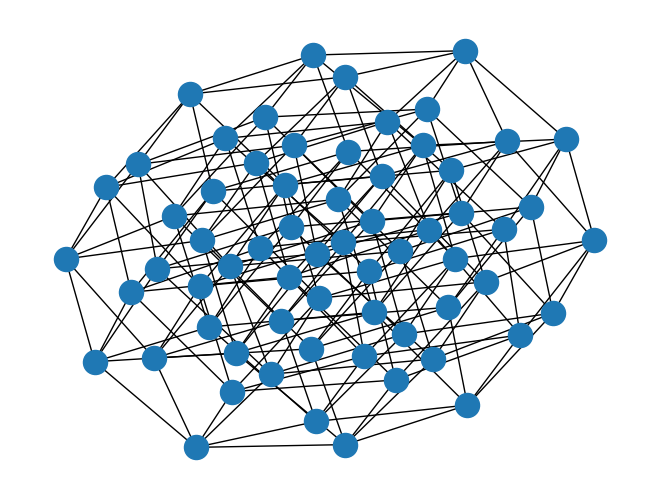

In [15]:
import networkx as nx
nx.draw(G)

In [55]:
dim = (2, 2, 4, 2, 2)
import numpy as np
np.prod(dim)
# str("{}_".format(*dim))
sorted(dim, reverse=True)

[4, 2, 2, 2, 2]

In [61]:
('L{}={},'*(len(dim)-1)+'{}').format(*zip(np.arange(len(dim)), dim))

IndexError: Replacement index 5 out of range for positional args tuple

In [69]:
import numpy as np

dim = (10, 20, 30)  # Example list of dimensions

formatted_string = '_'.join('L{}={}'.format(i+1, dim[i]) for i in range(len(dim)))

print(formatted_string)


L1=10_L2=20_L3=30


In [71]:
import numpy as np

def get_neighbor_shifts(lattice_type):
    if lattice_type == 'SC':
        # Simple cubic neighbors
        return [(1,0,0), (-1,0,0), (0,1,0), (0,-1,0), (0,0,1), (0,0,-1)]
    elif lattice_type == 'BCC':
        # Add body-centered neighbors to SC
        return [(1,0,0), (-1,0,0), (0,1,0), (0,-1,0), (0,0,1), (0,0,-1),
                (1,1,1), (-1,-1,-1), (1,-1,1), (-1,1,-1), (1,1,-1), (-1,-1,1),
                (1,-1,-1), (-1,1,1)]
    elif lattice_type == 'FCC':
        # Add face-centered neighbors to SC
        return [(1,0,0), (-1,0,0), (0,1,0), (0,-1,0), (0,0,1), (0,0,-1),
                (1,1,0), (-1,-1,0), (1,0,1), (0,1,1), (-1,0,-1), (0,-1,-1),
                (1,-1,0), (-1,1,0), (0,1,-1), (0,-1,1), (1,0,-1), (-1,0,1)]

def lattice_adjacency_matrix(lattice_type, L):
    N = L**3  # Total number of nodes
    adjacency_matrix = np.zeros((N, N))
    shifts = get_neighbor_shifts(lattice_type)

    for x in range(L):
        for y in range(L):
            for z in range(L):
                i = x * L**2 + y * L + z  # Convert 3D index to 1D
                for dx, dy, dz in shifts:
                    # Apply PBC
                    nx, ny, nz = (x + dx) % L, (y + dy) % L, (z + dz) % L
                    j = nx * L**2 + ny * L + nz  # Neighbor index
                    adjacency_matrix[i, j] = 1
                    
    return adjacency_matrix

# Example usage:
L = 4  # Lattice size
for lattice_type in ['SC', 'BCC', 'FCC']:
    print(f"{lattice_type} adjacency matrix for L={L}:")
    adj_matrix = lattice_adjacency_matrix(lattice_type, L)
    # Uncomment to print the matrix
    # print(adj_matrix)
    print(f"Matrix shape: {adj_matrix.shape}")


SC adjacency matrix for L=4:
Matrix shape: (64, 64)
BCC adjacency matrix for L=4:
Matrix shape: (64, 64)
FCC adjacency matrix for L=4:
Matrix shape: (64, 64)


In [65]:
zip(np.arange(len(dim)), dim).

In [59]:
for i in zip(np.arange(len(dim)), dim):
    print(i)

(0, 2)
(1, 2)
(2, 4)
(3, 2)
(4, 2)
